In [8]:

import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [9]:
labels_map = {
    0: "apple",
    1: "banana",
    2: "orange",
}

In [10]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Resize the images to (224, 224)
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

In [11]:
from src.components.CustomImageDataset import CustomImageDataset

train_dataset = CustomImageDataset("./labels/train_labels.csv", "./src/ref_imgs/img_train", transform=transform)
test_dataset = CustomImageDataset("./labels/test_labels.csv", "./src/ref_imgs/img_test", transform=transform)

In [12]:
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [13]:
transformToPIL = transforms.ToPILImage()

In [14]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
print(f"Shape: {img.shape}")
transformToPIL(img).show()

print(f"Label: {label}")

Feature batch shape: torch.Size([5, 3, 32, 32])
Labels batch shape: torch.Size([5])
Shape: torch.Size([3, 32, 32])
Label: 2


In [15]:
from src.components.Net import Net

net = Net()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        # print(inputs.shape)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        print(loss.item())

print('Finished Training')

1.1117308139801025
1.110351324081421
1.0981981754302979
1.127346396446228
1.0957578420639038
1.0966644287109375
1.0836565494537354
1.110374093055725
1.1239676475524902
1.0973979234695435
1.1081022024154663
1.1111067533493042
Finished Training


In [18]:
PATH = './fruit_identification_model.pth'
torch.save(net.state_dict(), PATH)

In [19]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    # transformToPIL(img).show()
    plt.imshow(np.transpose(np.array(img), (1, 2, 0)))
    plt.show()

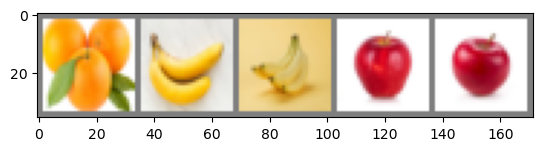

GroundTruth:  orange banana banana apple apple


In [20]:
dataiter = iter(test_loader)

images, labels = next(dataiter)

# print(test_loader)

# print images
imshow(torchvision.utils.make_grid(images))
# print(list(labels))
classes = ('apple', 'banana', 'orange')
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))
# print('GroundTruth: ', ' '.join(f'{labels_map[labels[j]]:5s}' for j in range(4)))

In [21]:
print(cuda_is_available())

NameError: name 'cuda_is_available' is not defined

In [22]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 8 test images: {100 * correct // total} %')

Accuracy of the network on the 8 test images: 37 %
